# New York Islanders Team Breakdown

In [878]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 100
pd.options.display.max_rows = 70

In [879]:
# Datasets
players = pd.read_csv("HockeyData/Master.csv")
season_scoring = pd.read_csv("HockeyData/Scoring.csv")
team_stats = pd.read_csv("HockeyData/Teams.csv")
teams_sc = pd.read_csv("HockeyData/TeamsSC.csv")
awards_players = pd.read_csv("HockeyData/AwardsPlayers.csv")
teams_post = pd.read_csv("HockeyData/TeamsPost.csv")
team_splits = pd.read_csv("HockeyData/TeamSplits.csv")
hof = pd.read_csv("HockeyData/HOF.csv")
goalies = pd.read_csv("HockeyData/Goalies.csv", error_bad_lines=False)
abbrev = pd.read_csv("HockeyData/abbrev.csv")

b'Skipping line 33: expected 23 fields, saw 24\nSkipping line 67: expected 23 fields, saw 24\nSkipping line 73: expected 23 fields, saw 24\nSkipping line 81: expected 23 fields, saw 24\nSkipping line 238: expected 23 fields, saw 24\nSkipping line 327: expected 23 fields, saw 24\nSkipping line 330: expected 23 fields, saw 24\nSkipping line 346: expected 23 fields, saw 24\nSkipping line 361: expected 23 fields, saw 24\nSkipping line 466: expected 23 fields, saw 24\nSkipping line 524: expected 23 fields, saw 24\nSkipping line 531: expected 23 fields, saw 24\nSkipping line 585: expected 23 fields, saw 24\nSkipping line 688: expected 23 fields, saw 24\nSkipping line 732: expected 23 fields, saw 24\nSkipping line 772: expected 23 fields, saw 24\nSkipping line 845: expected 23 fields, saw 24\nSkipping line 933: expected 23 fields, saw 24\nSkipping line 955: expected 23 fields, saw 24\nSkipping line 987: expected 23 fields, saw 24\nSkipping line 1065: expected 23 fields, saw 24\nSkipping line 

## Players Dataset

In [880]:
players.head()

,playerID,coachID,hofID,firstName,lastName,nameNote,nameGiven,nameNick,height,weight,shootCatch,legendsID,ihdbID,hrefID,firstNHL,lastNHL,firstWHA,lastWHA,pos,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity,deathYear,deathMon,deathDay,deathCountry,deathState,deathCity
0,aaltoan01,NaN,NaN,Antti,Aalto,NaN,Antti,NaN,73.0,210.0,L,14862,5928.0,aaltoan01,1997.0,2000.0,NaN,NaN,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,NaN,NaN,NaN,NaN,NaN,NaN
1,abbeybr01,NaN,NaN,Bruce,Abbey,NaN,Bruce,NaN,73.0,185.0,L,NaN,11918.0,abbeybr01,NaN,NaN,1975.0,1975.0,D,1951.0,8.0,18.0,Canada,ON,Toronto,NaN,NaN,NaN,NaN,NaN,NaN
2,abbotge01,NaN,NaN,George,Abbott,NaN,George Henry,Preacher,67.0,153.0,L,18411,14591.0,abbotge01,1943.0,1943.0,NaN,NaN,G,1911.0,8.0,3.0,Canada,ON,Synenham,NaN,NaN,NaN,NaN,NaN,NaN
3,abbotre01,NaN,NaN,Reg,Abbott,NaN,Reginald Stewart,NaN,71.0,164.0,L,11801,11431.0,abbotre01,1952.0,1952.0,NaN,NaN,C,1930.0,2.0,4.0,Canada,MB,Winnipeg,NaN,NaN,NaN,NaN,NaN,NaN
4,abdelju01,NaN,NaN,Justin,Abdelkader,NaN,NaN,NaN,73.0,195.0,L,21661,81002.0,abdelju01,2007.0,2011.0,NaN,NaN,L,1987.0,2.0,25.0,USA,MI,Muskegon,NaN,NaN,NaN,NaN,NaN,NaN


In [881]:
players = players[['playerID', 'hofID', 'firstName', 'lastName', 'shootCatch']]
players.head()

,playerID,hofID,firstName,lastName,shootCatch
0,aaltoan01,NaN,Antti,Aalto,L
1,abbeybr01,NaN,Bruce,Abbey,L
2,abbotge01,NaN,George,Abbott,L
3,abbotre01,NaN,Reg,Abbott,L
4,abdelju01,NaN,Justin,Abdelkader,L


In [882]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7761 entries, 0 to 7760
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   playerID    7520 non-null   object
 1   hofID       366 non-null    object
 2   firstName   7748 non-null   object
 3   lastName    7761 non-null   object
 4   shootCatch  7048 non-null   object
dtypes: object(5)
memory usage: 303.3+ KB


In [883]:
players.isnull().sum()

playerID       241
hofID         7395
firstName       13
lastName         0
shootCatch     713
dtype: int64

## Scoring Data

In [884]:
season_scoring.head()

,playerID,year,stint,tmID,lgID,pos,GP,G,A,Pts,PIM,+/-,PPG,PPA,SHG,SHA,GWG,GTG,SOG,PostGP,PostG,PostA,PostPts,PostPIM,Post+/-,PostPPG,PostPPA,PostSHG,PostSHA,PostGWG,PostSOG
0,aaltoan01,1997,1,ANA,NHL,C,3.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,aaltoan01,1998,1,ANA,NHL,C,73.0,3.0,5.0,8.0,24.0,-12.0,2.0,1.0,0.0,0.0,0.0,0.0,61.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,aaltoan01,1999,1,ANA,NHL,C,63.0,7.0,11.0,18.0,26.0,-13.0,1.0,0.0,0.0,0.0,1.0,0.0,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,aaltoan01,2000,1,ANA,NHL,C,12.0,1.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,abbeybr01,1975,1,CIN,WHA,D,17.0,1.0,0.0,1.0,12.0,-3.0,0.0,NaN,0.0,NaN,0.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [885]:
islanders_scoring = season_scoring[season_scoring['tmID']== 'NYI']
islanders_scoring

,playerID,year,stint,tmID,lgID,pos,GP,G,A,Pts,PIM,+/-,PPG,PPA,SHG,SHA,GWG,GTG,SOG,PostGP,PostG,PostA,PostPts,PostPIM,Post+/-,PostPPG,PostPPA,PostSHG,PostSHA,PostGWG,PostSOG
73,actonke01,1993,2,NYI,NHL,C,71.0,2.0,7.0,9.0,50.0,-1.0,0.0,0.0,0.0,2.0,0.0,0.0,33.0,4.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
188,afflebr01,1983,1,NYI,NHL,D,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,NaN,0.0,NaN,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,aivazmi01,1995,1,NYI,NHL,C,12.0,0.0,1.0,1.0,6.0,-6.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
511,andermi01,1999,2,NYI,NHL,L,19.0,0.0,3.0,3.0,4.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
514,anderni01,1995,1,NYI,NHL,L,47.0,14.0,12.0,26.0,12.0,-3.0,3.0,1.0,2.0,0.0,1.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45495,yorkmi01,2005,1,NYI,NHL,C,75.0,13.0,39.0,52.0,30.0,-9.0,4.0,18.0,1.0,1.0,2.0,NaN,146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45496,yorkmi01,2006,1,NYI,NHL,L,32.0,6.0,7.0,13.0,14.0,-9.0,2.0,1.0,0.0,0.0,1.0,NaN,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45716,zedniri01,2006,2,NYI,NHL,L,10.0,1.0,2.0,3.0,2.0,-2.0,0.0,0.0,0.0,0.0,0.0,NaN,15.0,5.0,0.0,0.0,0.0,8.0,-1.0,0.0,0.0,0.0,0.0,0.0,3.0
45830,zhitnal01,2005,1,NYI,NHL,D,59.0,5.0,24.0,29.0,88.0,4.0,3.0,17.0,0.0,0.0,0.0,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [886]:
islanders_scoring.describe()

,year,stint,GP,G,A,Pts,PIM,+/-,PPG,PPA,SHG,SHA,GWG,GTG,SOG,PostGP,PostG,PostA,PostPts,PostPIM,Post+/-,PostPPG,PostPPA,PostSHG,PostSHA,PostGWG,PostSOG
count,1372.000000,1372.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,923.000000,1366.000000,933.000000,1366.000000,1093.000000,1366.000000,478.000000,478.000000,478.000000,478.000000,478.000000,287.000000,478.000000,187.000000,478.000000,187.000000,478.000000,287.000000
mean,1992.697522,1.065598,42.866032,7.373353,12.279649,19.653001,37.717423,0.850659,1.802343,2.923077,0.284041,0.248660,0.953880,0.227813,66.266471,9.366109,1.656904,2.679916,4.336820,10.412134,-0.961672,0.424686,0.374332,0.079498,0.037433,0.280335,10.324042
std,11.103369,0.256351,28.388545,10.682415,14.553002,24.217415,44.066208,13.622098,3.619912,5.352999,0.844631,0.628636,1.680767,0.567975,69.958549,6.164572,2.694716,3.612240,5.911076,12.945605,2.585989,1.058844,0.879262,0.345620,0.240273,0.651454,11.371487
min,1972.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1984.000000,1.000000,14.000000,0.000000,1.000000,1.250000,6.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,5.000000,0.000000,0.000000,0.000000,2.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1993.000000,1.000000,45.000000,2.000000,7.000000,9.500000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,7.000000,1.000000,1.000000,2.000000,6.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
75%,2001.250000,1.000000,71.000000,11.000000,19.000000,30.000000,54.000000,4.000000,2.000000,3.000000,0.000000,0.000000,1.000000,0.000000,109.750000,14.000000,2.000000,4.000000,6.000000,14.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
max,2011.000000,3.000000,83.000000,69.000000,87.000000,147.000000,356.000000,76.000000,28.000000,30.000000,7.000000,4.000000,11.000000,4.000000,315.000000,21.000000,17.000000,23.000000,35.000000,85.000000,7.000000,9.000000,5.000000,3.000000,2.000000,5.000000,66.000000


## Team Stats

In [887]:
team_stats.head()

,year,lgID,tmID,franchID,confID,divID,rank,playoff,G,W,L,T,OTL,Pts,SoW,SoL,GF,GA,name,PIM,BenchMinor,PPG,PPC,SHA,PKG,PKC,SHF
0,1909,NHA,COB,BKN,NaN,NaN,4,NaN,12,4,8,0.0,NaN,8,NaN,NaN,79,104,Cobalt Silver Kings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1909,NHA,HAI,MTL,NaN,NaN,5,NaN,12,4,8,0.0,NaN,8,NaN,NaN,77,83,Haileybury Hockey Club,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1909,NHA,LES,TBS,NaN,NaN,7,NaN,12,2,10,0.0,NaN,4,NaN,NaN,59,100,Les Canadiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1909,NHA,MOS,MOS,NaN,NaN,6,NaN,12,3,8,1.0,NaN,7,NaN,NaN,52,95,Montreal Shamrocks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1909,NHA,MOW,MTW,NaN,NaN,1,NaN,12,11,1,0.0,NaN,22,NaN,NaN,91,41,Montreal Wanderers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [888]:
team_stats.describe()

,year,rank,G,W,L,T,OTL,Pts,SoW,SoL,GF,GA,PIM,BenchMinor,PPG,PPC,SHA,PKG,PKC,SHF
count,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1309.000000,358.000000,1519.000000,210.000000,210.000000,1519.000000,1519.000000,1409.000000,1028.000000,1101.000000,1100.000000,1101.000000,1101.000000,1100.000000,1101.000000
mean,1974.527979,3.219223,69.518104,30.872284,29.113891,9.020626,7.460894,71.276498,5.419048,5.419048,218.764977,218.764977,1139.860185,15.740272,62.803815,332.540000,8.753860,62.803815,332.626364,8.746594
std,28.708711,1.667720,19.699843,12.061197,11.234513,4.970282,3.610191,26.277603,2.561328,2.192990,77.905094,79.168426,503.841236,7.545232,16.540408,66.880887,3.921305,16.989719,69.423922,4.518477
min,1909.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,8.000000,2.000000,0.000000,16.000000,107.000000,0.000000,24.000000,130.000000,0.000000
25%,1957.000000,2.000000,70.000000,22.000000,21.500000,6.000000,5.000000,54.000000,4.000000,4.000000,176.000000,173.500000,823.000000,10.000000,51.000000,283.000000,6.000000,51.000000,279.750000,6.000000
50%,1981.000000,3.000000,80.000000,32.000000,29.000000,9.000000,7.000000,75.000000,5.000000,5.000000,227.000000,228.000000,1114.000000,16.000000,61.000000,331.000000,8.000000,61.000000,330.000000,8.000000
75%,1998.000000,4.000000,82.000000,40.000000,37.000000,12.000000,10.000000,91.000000,7.000000,7.000000,273.500000,276.000000,1463.000000,20.000000,74.000000,375.000000,11.000000,74.000000,381.000000,11.000000
max,2011.000000,10.000000,84.000000,62.000000,71.000000,24.000000,18.000000,132.000000,15.000000,12.000000,446.000000,446.000000,2713.000000,56.000000,119.000000,541.000000,22.000000,122.000000,550.000000,36.000000


In [889]:
team_stats = team_stats[team_stats['year']>=1972]
team_stats.head()

,year,lgID,tmID,franchID,confID,divID,rank,playoff,G,W,L,T,OTL,Pts,SoW,SoL,GF,GA,name,PIM,BenchMinor,PPG,PPC,SHA,PKG,PKC,SHF
501,1972,NHL,ATF,CAL,NaN,WD,7,NaN,78,25,38,15.0,NaN,65,NaN,NaN,191,239,Atlanta Flames,852.0,10.0,38.0,265.0,5.0,48.0,266.0,4.0
502,1972,NHL,BOS,BOS,NaN,ED,2,QF,78,51,22,5.0,NaN,107,NaN,NaN,330,235,Boston Bruins,1097.0,4.0,67.0,241.0,5.0,43.0,275.0,15.0
503,1972,NHL,BUF,BUF,NaN,ED,4,QF,78,37,27,14.0,NaN,88,NaN,NaN,257,219,Buffalo Sabres,940.0,2.0,52.0,270.0,5.0,35.0,241.0,5.0
504,1972,NHL,CHI,CHI,NaN,WD,1,F,78,42,27,9.0,NaN,93,NaN,NaN,284,225,Chicago Black Hawks,864.0,4.0,52.0,244.0,4.0,51.0,255.0,10.0
505,1972,NHL,CLF,CLE,NaN,WD,8,NaN,78,16,46,16.0,NaN,48,NaN,NaN,213,323,California Golden Seals,840.0,0.0,41.0,250.0,4.0,56.0,242.0,4.0


In [890]:
islanders_stats = team_stats[team_stats['tmID']=='NYI']
islanders_stats

,year,lgID,tmID,franchID,confID,divID,rank,playoff,G,W,L,T,OTL,Pts,SoW,SoL,GF,GA,name,PIM,BenchMinor,PPG,PPC,SHA,PKG,PKC,SHF
510,1972,NHL,NYI,NYI,NaN,ED,8,NaN,78,12,60,6.0,NaN,30,NaN,NaN,170,347,New York Islanders,881.0,10.0,28.0,258.0,13.0,63.0,261.0,2.0
538,1973,NHL,NYI,NYI,NaN,ED,8,NaN,78,19,41,18.0,NaN,56,NaN,NaN,182,247,New York Islanders,1075.0,6.0,32.0,230.0,13.0,63.0,262.0,7.0
567,1974,NHL,NYI,NYI,CC,PT,3,SF,80,33,25,22.0,NaN,88,NaN,NaN,264,221,New York Islanders,1116.0,2.0,51.0,273.0,7.0,55.0,340.0,11.0
599,1975,NHL,NYI,NYI,CC,PT,2,SF,80,42,21,17.0,NaN,101,NaN,NaN,297,190,New York Islanders,1277.0,10.0,92.0,290.0,4.0,55.0,377.0,11.0
631,1976,NHL,NYI,NYI,CC,PT,2,SF,80,47,21,12.0,NaN,106,NaN,NaN,288,193,New York Islanders,1012.0,10.0,56.0,240.0,3.0,47.0,278.0,16.0
661,1977,NHL,NYI,NYI,CC,PT,1,QF,80,48,17,15.0,NaN,111,NaN,NaN,334,210,New York Islanders,938.0,4.0,71.0,227.0,6.0,45.0,272.0,7.0
688,1978,NHL,NYI,NYI,CC,PT,1,SF,80,51,15,14.0,NaN,116,NaN,NaN,358,214,New York Islanders,1077.0,4.0,81.0,260.0,4.0,57.0,287.0,7.0
717,1979,NHL,NYI,NYI,CC,PT,2,SC,80,39,28,13.0,NaN,91,NaN,NaN,281,247,New York Islanders,1298.0,6.0,63.0,265.0,4.0,71.0,317.0,7.0
738,1980,NHL,NYI,NYI,CC,PT,1,SC,80,48,18,14.0,NaN,110,NaN,NaN,355,260,New York Islanders,1442.0,24.0,93.0,317.0,6.0,76.0,368.0,19.0
759,1981,NHL,NYI,NYI,WA,PT,1,SC,80,54,16,10.0,NaN,118,NaN,NaN,385,250,New York Islanders,1328.0,2.0,80.0,284.0,3.0,65.0,332.0,16.0


## Awards 

In [891]:
awards_players.head()

,playerID,award,year,lgID,note,pos
0,malonjo01,Art Ross,1917,NHL,NaN,NaN
1,cleghod01,Art Ross,1918,NHL,NaN,NaN
2,malonjo01,Art Ross,1919,NHL,NaN,NaN
3,lalonne01,Art Ross,1920,NHL,NaN,NaN
4,broadpu01,Art Ross,1921,NHL,NaN,NaN


In [892]:
awards_players = awards_players[['playerID', 'award', 'year']]

## Postseason Team Stats

In [893]:
teams_post.head()

,year,lgID,tmID,G,W,L,T,GF,GA,PIM,BenchMinor,PPG,PPC,SHA,PKG,PKC,SHF
0,1913,NHA,MOC,2,1,1,0,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1913,NHA,TBS,2,1,1,0,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1914,NHA,MOW,2,1,1,0,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1914,NHA,OT1,2,1,1,0,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1916,NHA,MOC,2,1,1,0,7,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [894]:
teams_post.tail()

,year,lgID,tmID,G,W,L,T,GF,GA,PIM,BenchMinor,PPG,PPC,SHA,PKG,PKC,SHF
922,2011,NHL,PIT,6,2,4,0,26,30,149.0,0.0,9.0,29.0,3.0,12.0,23.0,0.0
923,2011,NHL,SJS,5,1,4,0,8,14,97.0,0.0,2.0,17.0,0.0,6.0,18.0,0.0
924,2011,NHL,STL,9,4,5,0,20,23,212.0,0.0,6.0,35.0,2.0,3.0,38.0,0.0
925,2011,NHL,VAN,5,1,4,0,8,12,94.0,0.0,3.0,21.0,2.0,3.0,26.0,0.0
926,2011,NHL,WAS,14,7,7,0,29,30,122.0,2.0,7.0,39.0,0.0,6.0,48.0,0.0


In [895]:
teams_post.describe()

,year,G,W,L,T,GF,GA,PIM,BenchMinor,PPG,PPC,SHA,PKG,PKC,SHF
count,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,841.000000,572.000000,636.000000,580.000000,604.000000,636.000000,580.000000,636.000000
mean,1976.143474,8.809061,4.366775,4.366775,0.075512,25.601942,25.601942,160.376932,1.870629,8.102201,45.893103,1.097682,8.102201,45.893103,1.144654
std,25.697272,5.571371,4.152505,2.062547,0.326501,20.561505,15.456555,127.146613,2.365257,6.088631,28.566843,1.271734,5.021898,28.100528,1.528054
min,1913.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,4.000000,0.000000,0.000000,3.000000,0.000000
25%,1963.000000,5.000000,1.000000,3.000000,0.000000,10.000000,15.000000,72.000000,0.000000,3.000000,24.000000,0.000000,4.000000,25.000000,0.000000
50%,1982.000000,7.000000,3.000000,4.000000,0.000000,19.000000,22.000000,125.000000,2.000000,6.000000,38.000000,1.000000,7.000000,39.000000,1.000000
75%,1996.000000,12.000000,7.000000,6.000000,0.000000,36.000000,34.000000,212.000000,2.500000,12.000000,61.000000,2.000000,11.000000,62.250000,2.000000
max,2011.000000,26.000000,16.000000,11.000000,4.000000,98.000000,91.000000,871.000000,14.000000,35.000000,152.000000,8.000000,26.000000,158.000000,10.000000


In [896]:
teams_post = teams_post[teams_post['year']>=1972]
teams_post

,year,lgID,tmID,G,W,L,T,GF,GA,PIM,BenchMinor,PPG,PPC,SHA,PKG,PKC,SHF
286,1972,NHL,BOS,5,1,4,0,11,22,66.0,NaN,1.0,NaN,0.0,4.0,NaN,1.0
287,1972,NHL,BUF,6,2,4,0,16,21,59.0,NaN,4.0,NaN,0.0,4.0,NaN,0.0
288,1972,NHL,CHI,16,10,6,0,60,53,155.0,NaN,14.0,NaN,1.0,9.0,NaN,3.0
289,1972,NHL,MNS,6,2,4,0,12,14,112.0,NaN,3.0,NaN,1.0,4.0,NaN,0.0
290,1972,NHL,MTL,17,12,5,0,73,52,179.0,NaN,15.0,NaN,2.0,12.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,2011,NHL,PIT,6,2,4,0,26,30,149.0,0.0,9.0,29.0,3.0,12.0,23.0,0.0
923,2011,NHL,SJS,5,1,4,0,8,14,97.0,0.0,2.0,17.0,0.0,6.0,18.0,0.0
924,2011,NHL,STL,9,4,5,0,20,23,212.0,0.0,6.0,35.0,2.0,3.0,38.0,0.0
925,2011,NHL,VAN,5,1,4,0,8,12,94.0,0.0,3.0,21.0,2.0,3.0,26.0,0.0


In [897]:
teams_post.rename(columns = {'G':'post_G', 'W':'post_W', 'L':'post_L', 'T':'post_T', 'GF':'post_GF','GA':'post_GA',
                            'PIM':'post_PIM','BenchMinor':'post_BenchMinor', 'PPG':'post_PPG', 'PPC':'post_PPC', 
                            'SHA':'post_SHA','PKG':'post_PKG','PKC':'post_PKC','SHF':'post_SHF'}, inplace = True)
teams_post.head()

,year,lgID,tmID,post_G,post_W,post_L,post_T,post_GF,post_GA,post_PIM,post_BenchMinor,post_PPG,post_PPC,post_SHA,post_PKG,post_PKC,post_SHF
286,1972,NHL,BOS,5,1,4,0,11,22,66.0,NaN,1.0,NaN,0.0,4.0,NaN,1.0
287,1972,NHL,BUF,6,2,4,0,16,21,59.0,NaN,4.0,NaN,0.0,4.0,NaN,0.0
288,1972,NHL,CHI,16,10,6,0,60,53,155.0,NaN,14.0,NaN,1.0,9.0,NaN,3.0
289,1972,NHL,MNS,6,2,4,0,12,14,112.0,NaN,3.0,NaN,1.0,4.0,NaN,0.0
290,1972,NHL,MTL,17,12,5,0,73,52,179.0,NaN,15.0,NaN,2.0,12.0,NaN,1.0


In [898]:
islanders_post = teams_post[teams_post['tmID']=='NYI']
islanders_post

,year,lgID,tmID,post_G,post_W,post_L,post_T,post_GF,post_GA,post_PIM,post_BenchMinor,post_PPG,post_PPC,post_SHA,post_PKG,post_PKC,post_SHF
323,1974,NHL,NYI,17,9,8,0,47,50,377.0,0.0,15.0,77.0,3.0,9.0,72.0,2.0
344,1975,NHL,NYI,13,7,6,0,43,39,247.0,0.0,9.0,49.0,2.0,7.0,60.0,1.0
367,1976,NHL,NYI,12,8,4,0,36,32,160.0,0.0,6.0,34.0,1.0,9.0,43.0,1.0
388,1977,NHL,NYI,7,3,4,0,13,16,175.0,0.0,3.0,28.0,0.0,4.0,26.0,0.0
404,1978,NHL,NYI,10,6,4,0,27,21,144.0,0.0,3.0,31.0,0.0,3.0,27.0,1.0
424,1979,NHL,NYI,21,15,6,0,88,66,550.0,0.0,25.0,96.0,3.0,14.0,88.0,7.0
439,1980,NHL,NYI,18,15,3,0,97,48,310.0,0.0,31.0,80.0,1.0,19.0,96.0,9.0
455,1981,NHL,NYI,19,15,4,0,85,52,458.0,0.0,23.0,77.0,0.0,16.0,84.0,4.0
470,1982,NHL,NYI,20,15,5,0,94,53,329.0,0.0,20.0,81.0,3.0,13.0,100.0,3.0
487,1983,NHL,NYI,21,12,9,0,62,60,405.0,0.0,13.0,81.0,1.0,18.0,101.0,2.0


## Hall of Famers

In [899]:
hof.head()

,year,hofID,name,category
0,1945,bakerho01h,Hobey Baker,Player
1,1945,gardich01h,Charlie Gardiner,Player
2,1945,gerared01h,Eddie Gerard,Player
3,1945,mcgeefr01h,Frank McGee,Player
4,1945,morenho01h,Howie Morenz,Player


## Goalies

In [900]:
goalies.head()

,playerID,year,stint,tmID,lgID,GP,Min,W,L,T/OL,ENG,SHO,GA,SA,PostGP,PostMin,PostW,PostL,PostT,PostENG,PostSHO,PostGA,PostSA
0,abbotge01,1943,1,BOS,NHL,1.0,60.0,0.0,1.0,0.0,NaN,0.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,abrahch01,1974,1,NEW,WHA,16.0,870.0,8.0,6.0,1.0,0.0,1.0,47.0,504.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,abrahch01,1975,1,NEW,WHA,41.0,2385.0,18.0,18.0,2.0,1.0,2.0,136.0,1221.0,1.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
3,abrahch01,1976,1,NEW,WHA,45.0,2484.0,15.0,22.0,4.0,0.0,0.0,159.0,1438.0,2.0,90.0,0.0,1.0,NaN,0.0,0.0,5.0,51.0
4,adamsjo02,1972,1,BOS,NHL,14.0,780.0,9.0,3.0,1.0,0.0,1.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [901]:
print(goalies.shape)
goalies.describe()

(4189, 23)


,year,stint,GP,Min,W,L,T/OL,ENG,SHO,GA,SA,PostGP,PostMin,PostW,PostL,PostT,PostENG,PostSHO,PostGA,PostSA
count,4189.000000,4189.000000,4168.000000,4168.000000,4168.000000,4168.000000,4168.000000,3444.000000,4168.000000,4168.000000,2596.000000,1417.000000,1417.000000,1417.000000,1417.000000,106.000000,1165.000000,1417.000000,1417.000000,793.000000
mean,1979.995703,1.058248,26.485605,1498.580374,10.955134,10.543906,3.244722,1.689895,1.418186,76.487284,731.811248,6.035286,350.923077,2.796048,2.796048,0.622642,0.449785,0.416373,16.085392,182.360656
std,24.378609,0.239282,20.970119,1235.739566,10.612314,8.784654,3.556138,1.905920,2.207939,60.512088,608.036130,5.163857,325.707664,3.615728,2.188513,0.749004,0.720534,0.843863,13.647724,175.156564
min,1909.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1972.000000,1.000000,7.000000,334.750000,2.000000,3.000000,0.000000,0.000000,0.000000,20.000000,162.750000,2.000000,120.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.000000,40.000000
50%,1985.000000,1.000000,23.000000,1256.000000,8.000000,9.000000,2.000000,1.000000,0.000000,68.000000,602.500000,4.000000,252.000000,1.000000,3.000000,0.500000,0.000000,0.000000,13.000000,136.000000
75%,1998.000000,1.000000,43.000000,2460.000000,18.000000,17.000000,5.000000,3.000000,2.000000,122.000000,1202.250000,8.000000,488.000000,4.000000,4.000000,1.000000,1.000000,1.000000,23.000000,261.000000
max,2011.000000,3.000000,79.000000,4697.000000,48.000000,48.000000,22.000000,12.000000,22.000000,310.000000,2488.000000,26.000000,1655.000000,16.000000,11.000000,4.000000,5.000000,7.000000,74.000000,849.000000


In [902]:
islanders_goalies = goalies[goalies['tmID']=='NYI']
islanders_goalies

,playerID,year,stint,tmID,lgID,GP,Min,W,L,T/OL,ENG,SHO,GA,SA,PostGP,PostMin,PostW,PostL,PostT,PostENG,PostSHO,PostGA,PostSA
318,bironma01,2009,1,NYI,NHL,29.0,1634.0,9.0,14.0,4.0,0.0,1.0,89.0,859.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
464,broderi01,1979,1,NYI,NHL,2.0,80.0,1.0,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737,cousima01,1998,1,NYI,NHL,6.0,293.0,0.0,4.0,0.0,0.0,0.0,14.0,119.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
825,danisya01,2008,1,NYI,NHL,31.0,1760.0,10.0,17.0,3.0,1.0,2.0,84.0,933.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
880,desjage01,1972,1,NYI,NHL,44.0,2498.0,5.0,35.0,3.0,0.0,0.0,195.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3700,terrech01,2000,2,NYI,NHL,8.0,443.0,2.0,4.0,1.0,2.0,0.0,18.0,205.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3854,valiqst01,1999,1,NYI,NHL,6.0,193.0,2.0,0.0,0.0,0.0,0.0,6.0,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3879,vanbijo01,2000,1,NYI,NHL,44.0,2390.0,10.0,25.0,5.0,4.0,1.0,120.0,1177.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4027,weekeke01,1999,2,NYI,NHL,36.0,2026.0,10.0,20.0,4.0,3.0,1.0,115.0,1173.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Players Stats Final Dataset

In [903]:
players_stats = season_scoring.merge(players, on="playerID")

In [904]:
players_stats.head()

,playerID,year,stint,tmID,lgID,pos,GP,G,A,Pts,PIM,+/-,PPG,PPA,SHG,SHA,GWG,GTG,SOG,PostGP,PostG,PostA,PostPts,PostPIM,Post+/-,PostPPG,PostPPA,PostSHG,PostSHA,PostGWG,PostSOG,hofID,firstName,lastName,shootCatch
0,aaltoan01,1997,1,ANA,NHL,C,3.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Antti,Aalto,L
1,aaltoan01,1998,1,ANA,NHL,C,73.0,3.0,5.0,8.0,24.0,-12.0,2.0,1.0,0.0,0.0,0.0,0.0,61.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,Antti,Aalto,L
2,aaltoan01,1999,1,ANA,NHL,C,63.0,7.0,11.0,18.0,26.0,-13.0,1.0,0.0,0.0,0.0,1.0,0.0,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Antti,Aalto,L
3,aaltoan01,2000,1,ANA,NHL,C,12.0,1.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Antti,Aalto,L
4,abbeybr01,1975,1,CIN,WHA,D,17.0,1.0,0.0,1.0,12.0,-3.0,0.0,NaN,0.0,NaN,0.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bruce,Abbey,L


In [905]:
# add hall of famer column
hof['HOF'] = 1
hof = hof[['hofID', 'HOF']]
players_stats = players_stats.merge(hof, how='left', on='hofID')
players_stats.head()

,playerID,year,stint,tmID,lgID,pos,GP,G,A,Pts,PIM,+/-,PPG,PPA,SHG,SHA,GWG,GTG,SOG,PostGP,PostG,PostA,PostPts,PostPIM,Post+/-,PostPPG,PostPPA,PostSHG,PostSHA,PostGWG,PostSOG,hofID,firstName,lastName,shootCatch,HOF
0,aaltoan01,1997,1,ANA,NHL,C,3.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Antti,Aalto,L,NaN
1,aaltoan01,1998,1,ANA,NHL,C,73.0,3.0,5.0,8.0,24.0,-12.0,2.0,1.0,0.0,0.0,0.0,0.0,61.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,Antti,Aalto,L,NaN
2,aaltoan01,1999,1,ANA,NHL,C,63.0,7.0,11.0,18.0,26.0,-13.0,1.0,0.0,0.0,0.0,1.0,0.0,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Antti,Aalto,L,NaN
3,aaltoan01,2000,1,ANA,NHL,C,12.0,1.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Antti,Aalto,L,NaN
4,abbeybr01,1975,1,CIN,WHA,D,17.0,1.0,0.0,1.0,12.0,-3.0,0.0,NaN,0.0,NaN,0.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bruce,Abbey,L,NaN


In [906]:
# Fill NA with 0. 0 = Did not make the hall of fame
players_stats = players_stats.fillna({'HOF': 0})
players_stats.head(15)

,playerID,year,stint,tmID,lgID,pos,GP,G,A,Pts,PIM,+/-,PPG,PPA,SHG,SHA,GWG,GTG,SOG,PostGP,PostG,PostA,PostPts,PostPIM,Post+/-,PostPPG,PostPPA,PostSHG,PostSHA,PostGWG,PostSOG,hofID,firstName,lastName,shootCatch,HOF
0,aaltoan01,1997,1,ANA,NHL,C,3.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Antti,Aalto,L,0.0
1,aaltoan01,1998,1,ANA,NHL,C,73.0,3.0,5.0,8.0,24.0,-12.0,2.0,1.0,0.0,0.0,0.0,0.0,61.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,Antti,Aalto,L,0.0
2,aaltoan01,1999,1,ANA,NHL,C,63.0,7.0,11.0,18.0,26.0,-13.0,1.0,0.0,0.0,0.0,1.0,0.0,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Antti,Aalto,L,0.0
3,aaltoan01,2000,1,ANA,NHL,C,12.0,1.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Antti,Aalto,L,0.0
4,abbeybr01,1975,1,CIN,WHA,D,17.0,1.0,0.0,1.0,12.0,-3.0,0.0,NaN,0.0,NaN,0.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bruce,Abbey,L,0.0
5,abbotge01,1943,1,BOS,NHL,G,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,George,Abbott,L,0.0
6,abbotre01,1952,1,MTL,NHL,C,3.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reg,Abbott,L,0.0
7,abdelju01,2007,1,DET,NHL,L,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Justin,Abdelkader,L,0.0
8,abdelju01,2008,1,DET,NHL,L,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.0,10.0,2.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,11.0,NaN,Justin,Abdelkader,L,0.0
9,abdelju01,2009,1,DET,NHL,L,50.0,3.0,3.0,6.0,35.0,-11.0,0.0,0.0,0.0,0.0,0.0,NaN,79.0,11.0,1.0,1.0,2.0,36.0,1.0,0.0,0.0,0.0,0.0,0.0,12.0,NaN,Justin,Abdelkader,L,0.0


## Islanders Player Stats

In [907]:
islanders = players_stats[players_stats['tmID']=='NYI']
islanders

,playerID,year,stint,tmID,lgID,pos,GP,G,A,Pts,PIM,+/-,PPG,PPA,SHG,SHA,GWG,GTG,SOG,PostGP,PostG,PostA,PostPts,PostPIM,Post+/-,PostPPG,PostPPA,PostSHG,PostSHA,PostGWG,PostSOG,hofID,firstName,lastName,shootCatch,HOF
73,actonke01,1993,2,NYI,NHL,C,71.0,2.0,7.0,9.0,50.0,-1.0,0.0,0.0,0.0,2.0,0.0,0.0,33.0,4.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,Keith,Acton,L,0.0
188,afflebr01,1983,1,NYI,NHL,D,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,NaN,0.0,NaN,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bruce,Affleck,L,0.0
237,aivazmi01,1995,1,NYI,NHL,C,12.0,0.0,1.0,1.0,6.0,-6.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Micah,Aivazoff,L,0.0
511,andermi01,1999,2,NYI,NHL,L,19.0,0.0,3.0,3.0,4.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mikael,Andersson,L,0.0
514,anderni01,1995,1,NYI,NHL,L,47.0,14.0,12.0,26.0,12.0,-3.0,3.0,1.0,2.0,0.0,1.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Niklas,Andersson,L,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45495,yorkmi01,2005,1,NYI,NHL,C,75.0,13.0,39.0,52.0,30.0,-9.0,4.0,18.0,1.0,1.0,2.0,NaN,146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mike,York,R,0.0
45496,yorkmi01,2006,1,NYI,NHL,L,32.0,6.0,7.0,13.0,14.0,-9.0,2.0,1.0,0.0,0.0,1.0,NaN,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mike,York,R,0.0
45716,zedniri01,2006,2,NYI,NHL,L,10.0,1.0,2.0,3.0,2.0,-2.0,0.0,0.0,0.0,0.0,0.0,NaN,15.0,5.0,0.0,0.0,0.0,8.0,-1.0,0.0,0.0,0.0,0.0,0.0,3.0,NaN,Richard,Zednik,L,0.0
45830,zhitnal01,2005,1,NYI,NHL,D,59.0,5.0,24.0,29.0,88.0,4.0,3.0,17.0,0.0,0.0,0.0,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alexei,Zhitnik,L,0.0


In [908]:
islanders.isnull().sum()

playerID         0
year             0
stint            0
tmID             0
lgID             0
pos              0
GP               6
G                6
A                6
Pts              6
PIM              6
+/-              6
PPG              6
PPA            449
SHG              6
SHA            439
GWG              6
GTG            279
SOG              6
PostGP         894
PostG          894
PostA          894
PostPts        894
PostPIM        894
Post+/-       1085
PostPPG        894
PostPPA       1185
PostSHG        894
PostSHA       1185
PostGWG        894
PostSOG       1085
hofID         1295
firstName        0
lastName         0
shootCatch      21
HOF              0
dtype: int64

In [909]:
# Drop shootCatch, GWG, GTG, SOG, PostGWG, PostSOG, hofID, stint column
islanders.drop(columns=['shootCatch','GWG','GTG','SOG','PostGWG','PostSOG','hofID','stint'], inplace=True)
islanders.head(10)

/Users/brandonhoskins/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,playerID,year,tmID,lgID,pos,GP,G,A,Pts,PIM,+/-,PPG,PPA,SHG,SHA,PostGP,PostG,PostA,PostPts,PostPIM,Post+/-,PostPPG,PostPPA,PostSHG,PostSHA,firstName,lastName,HOF
73,actonke01,1993,NYI,NHL,C,71.0,2.0,7.0,9.0,50.0,-1.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,Keith,Acton,0.0
188,afflebr01,1983,NYI,NHL,D,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bruce,Affleck,0.0
237,aivazmi01,1995,NYI,NHL,C,12.0,0.0,1.0,1.0,6.0,-6.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Micah,Aivazoff,0.0
511,andermi01,1999,NYI,NHL,L,19.0,0.0,3.0,3.0,4.0,-1.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mikael,Andersson,0.0
514,anderni01,1995,NYI,NHL,L,47.0,14.0,12.0,26.0,12.0,-3.0,3.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Niklas,Andersson,0.0
515,anderni01,1996,NYI,NHL,L,74.0,12.0,31.0,43.0,57.0,4.0,1.0,5.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Niklas,Andersson,0.0
517,anderni01,1999,NYI,NHL,L,17.0,3.0,7.0,10.0,8.0,-3.0,1.0,3.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Niklas,Andersson,0.0
773,archida01,1996,NYI,NHL,C,7.0,0.0,0.0,0.0,4.0,-4.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dave,Archibald,0.0
806,armstde01,1993,NYI,NHL,C,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Derek,Armstrong,0.0
807,armstde01,1995,NYI,NHL,C,19.0,1.0,3.0,4.0,14.0,-6.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Derek,Armstrong,0.0


In [910]:
islanders.isnull().sum()

playerID        0
year            0
tmID            0
lgID            0
pos             0
GP              6
G               6
A               6
Pts             6
PIM             6
+/-             6
PPG             6
PPA           449
SHG             6
SHA           439
PostGP        894
PostG         894
PostA         894
PostPts       894
PostPIM       894
Post+/-      1085
PostPPG       894
PostPPA      1185
PostSHG       894
PostSHA      1185
firstName       0
lastName        0
HOF             0
dtype: int64

In [911]:
islanders.fillna({'PostGP': 0, 'PostG': 0, 'PostA': 0, 'PostPts': 0, 'PostPIM': 0, 'PostPPG': 0, 'PostSHG': 0}, inplace=True)

/Users/brandonhoskins/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [912]:
islanders.drop(columns=['PPA','SHA','Post+/-','PostPPA','PostSHA'], inplace=True)

/Users/brandonhoskins/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [913]:
islanders

,playerID,year,tmID,lgID,pos,GP,G,A,Pts,PIM,+/-,PPG,SHG,PostGP,PostG,PostA,PostPts,PostPIM,PostPPG,PostSHG,firstName,lastName,HOF
73,actonke01,1993,NYI,NHL,C,71.0,2.0,7.0,9.0,50.0,-1.0,0.0,0.0,4.0,0.0,0.0,0.0,8.0,0.0,0.0,Keith,Acton,0.0
188,afflebr01,1983,NYI,NHL,D,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bruce,Affleck,0.0
237,aivazmi01,1995,NYI,NHL,C,12.0,0.0,1.0,1.0,6.0,-6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Micah,Aivazoff,0.0
511,andermi01,1999,NYI,NHL,L,19.0,0.0,3.0,3.0,4.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mikael,Andersson,0.0
514,anderni01,1995,NYI,NHL,L,47.0,14.0,12.0,26.0,12.0,-3.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Niklas,Andersson,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45495,yorkmi01,2005,NYI,NHL,C,75.0,13.0,39.0,52.0,30.0,-9.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mike,York,0.0
45496,yorkmi01,2006,NYI,NHL,L,32.0,6.0,7.0,13.0,14.0,-9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mike,York,0.0
45716,zedniri01,2006,NYI,NHL,L,10.0,1.0,2.0,3.0,2.0,-2.0,0.0,0.0,5.0,0.0,0.0,0.0,8.0,0.0,0.0,Richard,Zednik,0.0
45830,zhitnal01,2005,NYI,NHL,D,59.0,5.0,24.0,29.0,88.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Alexei,Zhitnik,0.0


In [914]:
islanders.isnull().sum()

playerID     0
year         0
tmID         0
lgID         0
pos          0
GP           6
G            6
A            6
Pts          6
PIM          6
+/-          6
PPG          6
SHG          6
PostGP       0
PostG        0
PostA        0
PostPts      0
PostPIM      0
PostPPG      0
PostSHG      0
firstName    0
lastName     0
HOF          0
dtype: int64

In [915]:
islanders[islanders['GP'].isnull()]

,playerID,year,tmID,lgID,pos,GP,G,A,Pts,PIM,+/-,PPG,SHG,PostGP,PostG,PostA,PostPts,PostPIM,PostPPG,PostSHG,firstName,lastName,HOF
8726,dalgabr01,1986,NYI,NHL,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Brad,Dalgarno,0.0
8745,dallmro01,1989,NYI,NHL,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Rod,Dallman,0.0
18395,huntetr01,2001,NYI,NHL,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,1.0,2.0,2.0,0.0,0.0,Trent,Hunter,0.0
19771,junkest01,1992,NYI,NHL,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,1.0,1.0,0.0,0.0,0.0,Steve,Junker,0.0
36778,salvida01,1976,NYI,NHL,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,1.0,2.0,0.0,0.0,Dave,Salvian,0.0
37512,scisssc01,1992,NYI,NHL,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Scott,Scissons,0.0


In [916]:
islanders.fillna({'GP':0, 'G':0, 'A':0, 'Pts':0, 'PIM':0, '+/-':0, 'PPG':0, 'SHG':0}, inplace = True)

/Users/brandonhoskins/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [917]:
islanders.isnull().sum()

playerID     0
year         0
tmID         0
lgID         0
pos          0
GP           0
G            0
A            0
Pts          0
PIM          0
+/-          0
PPG          0
SHG          0
PostGP       0
PostG        0
PostA        0
PostPts      0
PostPIM      0
PostPPG      0
PostSHG      0
firstName    0
lastName     0
HOF          0
dtype: int64

In [918]:
islanders.head()

,playerID,year,tmID,lgID,pos,GP,G,A,Pts,PIM,+/-,PPG,SHG,PostGP,PostG,PostA,PostPts,PostPIM,PostPPG,PostSHG,firstName,lastName,HOF
73,actonke01,1993,NYI,NHL,C,71.0,2.0,7.0,9.0,50.0,-1.0,0.0,0.0,4.0,0.0,0.0,0.0,8.0,0.0,0.0,Keith,Acton,0.0
188,afflebr01,1983,NYI,NHL,D,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bruce,Affleck,0.0
237,aivazmi01,1995,NYI,NHL,C,12.0,0.0,1.0,1.0,6.0,-6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Micah,Aivazoff,0.0
511,andermi01,1999,NYI,NHL,L,19.0,0.0,3.0,3.0,4.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mikael,Andersson,0.0
514,anderni01,1995,NYI,NHL,L,47.0,14.0,12.0,26.0,12.0,-3.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Niklas,Andersson,0.0


In [919]:
islanders['name'] = islanders[['firstName','lastName']].apply(lambda x: ' '.join(x), axis=1)

<ipython-input-919-fd1f3905d684>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  islanders['name'] = islanders[['firstName','lastName']].apply(lambda x: ' '.join(x), axis=1)


In [920]:
islanders.head()

,playerID,year,tmID,lgID,pos,GP,G,A,Pts,PIM,+/-,PPG,SHG,PostGP,PostG,PostA,PostPts,PostPIM,PostPPG,PostSHG,firstName,lastName,HOF,name
73,actonke01,1993,NYI,NHL,C,71.0,2.0,7.0,9.0,50.0,-1.0,0.0,0.0,4.0,0.0,0.0,0.0,8.0,0.0,0.0,Keith,Acton,0.0,Keith Acton
188,afflebr01,1983,NYI,NHL,D,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bruce,Affleck,0.0,Bruce Affleck
237,aivazmi01,1995,NYI,NHL,C,12.0,0.0,1.0,1.0,6.0,-6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Micah,Aivazoff,0.0,Micah Aivazoff
511,andermi01,1999,NYI,NHL,L,19.0,0.0,3.0,3.0,4.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mikael,Andersson,0.0,Mikael Andersson
514,anderni01,1995,NYI,NHL,L,47.0,14.0,12.0,26.0,12.0,-3.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Niklas,Andersson,0.0,Niklas Andersson


In [921]:
islanders.drop(columns=['firstName', 'lastName'], inplace=True)
islanders.head()

/Users/brandonhoskins/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,playerID,year,tmID,lgID,pos,GP,G,A,Pts,PIM,+/-,PPG,SHG,PostGP,PostG,PostA,PostPts,PostPIM,PostPPG,PostSHG,HOF,name
73,actonke01,1993,NYI,NHL,C,71.0,2.0,7.0,9.0,50.0,-1.0,0.0,0.0,4.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,Keith Acton
188,afflebr01,1983,NYI,NHL,D,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bruce Affleck
237,aivazmi01,1995,NYI,NHL,C,12.0,0.0,1.0,1.0,6.0,-6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Micah Aivazoff
511,andermi01,1999,NYI,NHL,L,19.0,0.0,3.0,3.0,4.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mikael Andersson
514,anderni01,1995,NYI,NHL,L,47.0,14.0,12.0,26.0,12.0,-3.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Niklas Andersson


In [922]:
islanders.shape

(1372, 22)

In [923]:
islanders.to_csv('islanders.csv')

In [966]:
top_goal_scorers = islanders.groupby("name")["G"].sum().sort_values(ascending=False).head(5)
top_goal_scorers

name
Mike Bossy        573.0
Bryan Trottier    500.0
Denis Potvin      310.0
Clark Gillies     304.0
Brent Sutter      287.0
Name: G, dtype: float64

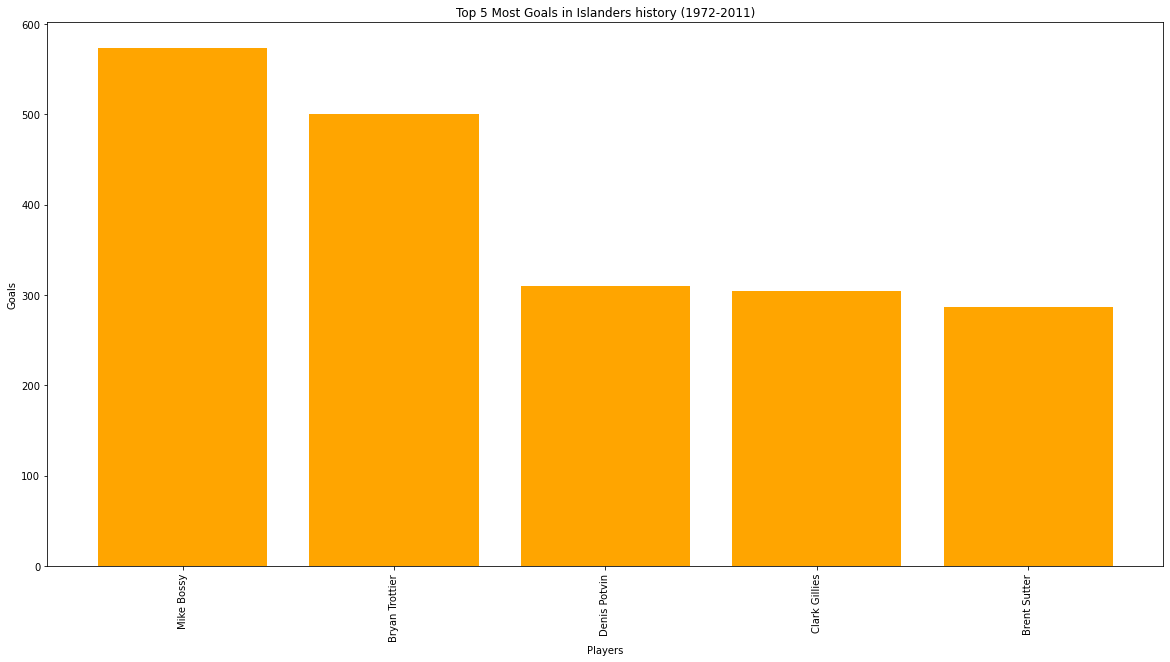

In [967]:
plt.figure(figsize=(20,10))
plt.bar(x=top_goal_scorers.index, height=top_goal_scorers,data = top_goal_scorers,color='orange')
plt.title('Top 5 Most Goals in Islanders history (1972-2011)')
plt.xlabel('Players')
plt.ylabel('Goals')
plt.xticks(rotation=90)
plt.savefig("NYI_top_goals.png");

In [968]:
top_points_scorers = islanders.groupby("name")["Pts"].sum().sort_values(ascending=False).head(5)
top_points_scorers

name
Bryan Trottier    1353.0
Mike Bossy        1126.0
Denis Potvin      1052.0
Clark Gillies      663.0
Brent Sutter       610.0
Name: Pts, dtype: float64

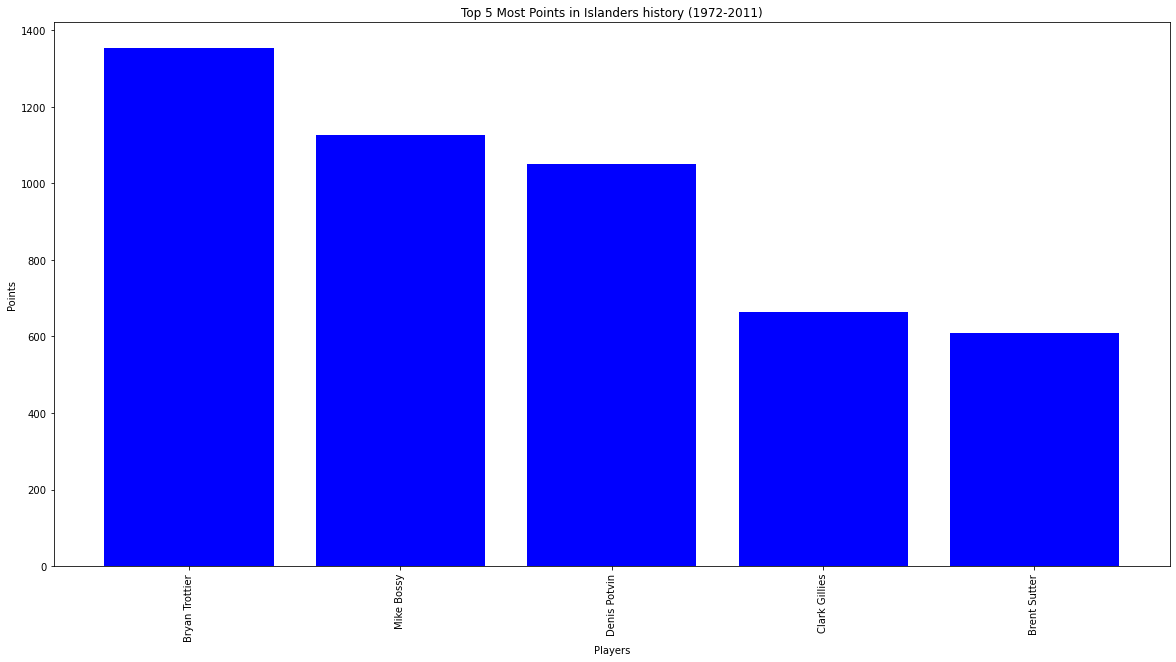

In [969]:
plt.figure(figsize=(20,10))
plt.bar(x=top_points_scorers.index, height=top_points_scorers,data = top_points_scorers,color='blue')
plt.title('Top 5 Most Points in Islanders history (1972-2011)')
plt.xlabel('Players')
plt.ylabel('Points')
plt.xticks(rotation=90)
plt.savefig("NYI_top_points.png");

In [928]:
islanders[islanders['name']=='Mike Bossy']

,playerID,year,tmID,lgID,pos,GP,G,A,Pts,PIM,+/-,PPG,SHG,PostGP,PostG,PostA,PostPts,PostPIM,PostPPG,PostSHG,HOF,name
3531,bossymi01,1977,NYI,NHL,R,73.0,53.0,38.0,91.0,6.0,31.0,25.0,0.0,7.0,2.0,2.0,4.0,2.0,0.0,0.0,1.0,Mike Bossy
3532,bossymi01,1978,NYI,NHL,R,80.0,69.0,57.0,126.0,25.0,63.0,27.0,0.0,10.0,6.0,2.0,8.0,2.0,2.0,0.0,1.0,Mike Bossy
3533,bossymi01,1979,NYI,NHL,R,75.0,51.0,41.0,92.0,12.0,28.0,16.0,0.0,16.0,10.0,13.0,23.0,8.0,6.0,0.0,1.0,Mike Bossy
3534,bossymi01,1980,NYI,NHL,R,79.0,68.0,51.0,119.0,32.0,37.0,28.0,2.0,18.0,17.0,18.0,35.0,4.0,9.0,0.0,1.0,Mike Bossy
3535,bossymi01,1981,NYI,NHL,R,80.0,64.0,83.0,147.0,22.0,69.0,17.0,0.0,19.0,17.0,10.0,27.0,0.0,6.0,0.0,1.0,Mike Bossy
3536,bossymi01,1982,NYI,NHL,R,79.0,60.0,58.0,118.0,20.0,27.0,19.0,0.0,19.0,17.0,9.0,26.0,10.0,6.0,0.0,1.0,Mike Bossy
3537,bossymi01,1983,NYI,NHL,R,67.0,51.0,67.0,118.0,8.0,66.0,6.0,0.0,21.0,8.0,10.0,18.0,4.0,2.0,0.0,1.0,Mike Bossy
3538,bossymi01,1984,NYI,NHL,R,76.0,58.0,59.0,117.0,38.0,37.0,14.0,4.0,10.0,5.0,6.0,11.0,4.0,2.0,0.0,1.0,Mike Bossy
3539,bossymi01,1985,NYI,NHL,R,80.0,61.0,62.0,123.0,14.0,30.0,21.0,1.0,3.0,1.0,2.0,3.0,4.0,0.0,0.0,1.0,Mike Bossy
3540,bossymi01,1986,NYI,NHL,R,63.0,38.0,37.0,75.0,33.0,-7.0,8.0,1.0,6.0,2.0,3.0,5.0,0.0,2.0,0.0,1.0,Mike Bossy


In [929]:
islanders[islanders['name']=='Bryan Trottier']

,playerID,year,tmID,lgID,pos,GP,G,A,Pts,PIM,+/-,PPG,SHG,PostGP,PostG,PostA,PostPts,PostPIM,PostPPG,PostSHG,HOF,name
42438,trottbr01,1975,NYI,NHL,C,80.0,32.0,63.0,95.0,21.0,28.0,11.0,1.0,13.0,1.0,7.0,8.0,8.0,0.0,0.0,1.0,Bryan Trottier
42439,trottbr01,1976,NYI,NHL,C,76.0,30.0,42.0,72.0,34.0,28.0,11.0,1.0,12.0,2.0,8.0,10.0,2.0,0.0,0.0,1.0,Bryan Trottier
42440,trottbr01,1977,NYI,NHL,C,77.0,46.0,77.0,123.0,46.0,52.0,13.0,2.0,7.0,0.0,3.0,3.0,4.0,0.0,0.0,1.0,Bryan Trottier
42441,trottbr01,1978,NYI,NHL,C,76.0,47.0,87.0,134.0,50.0,76.0,15.0,0.0,10.0,2.0,4.0,6.0,13.0,0.0,0.0,1.0,Bryan Trottier
42442,trottbr01,1979,NYI,NHL,C,78.0,42.0,62.0,104.0,68.0,31.0,15.0,0.0,21.0,12.0,17.0,29.0,16.0,4.0,2.0,1.0,Bryan Trottier
42443,trottbr01,1980,NYI,NHL,C,73.0,31.0,72.0,103.0,74.0,49.0,9.0,2.0,18.0,11.0,18.0,29.0,34.0,4.0,2.0,1.0,Bryan Trottier
42444,trottbr01,1981,NYI,NHL,C,80.0,50.0,79.0,129.0,88.0,70.0,18.0,2.0,19.0,6.0,23.0,29.0,40.0,2.0,0.0,1.0,Bryan Trottier
42445,trottbr01,1982,NYI,NHL,C,80.0,34.0,55.0,89.0,68.0,37.0,13.0,0.0,17.0,8.0,12.0,20.0,18.0,3.0,0.0,1.0,Bryan Trottier
42446,trottbr01,1983,NYI,NHL,C,68.0,40.0,71.0,111.0,59.0,70.0,7.0,3.0,21.0,8.0,6.0,14.0,49.0,1.0,0.0,1.0,Bryan Trottier
42447,trottbr01,1984,NYI,NHL,C,68.0,28.0,31.0,59.0,47.0,5.0,4.0,5.0,10.0,4.0,2.0,6.0,8.0,1.0,0.0,1.0,Bryan Trottier


## Team Stats Final Dataset

In [930]:
team_stats = team_stats.merge(teams_post, on=["year", "lgID", "tmID"], how='left')
team_stats

,year,lgID,tmID,franchID,confID,divID,rank,playoff,G,W,L,T,OTL,Pts,SoW,SoL,GF,GA,name,PIM,BenchMinor,PPG,PPC,SHA,PKG,PKC,SHF,post_G,post_W,post_L,post_T,post_GF,post_GA,post_PIM,post_BenchMinor,post_PPG,post_PPC,post_SHA,post_PKG,post_PKC,post_SHF
0,1972,NHL,ATF,CAL,NaN,WD,7,NaN,78,25,38,15.0,NaN,65,NaN,NaN,191,239,Atlanta Flames,852.0,10.0,38.0,265.0,5.0,48.0,266.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1972,NHL,BOS,BOS,NaN,ED,2,QF,78,51,22,5.0,NaN,107,NaN,NaN,330,235,Boston Bruins,1097.0,4.0,67.0,241.0,5.0,43.0,275.0,15.0,5.0,1.0,4.0,0.0,11.0,22.0,66.0,NaN,1.0,NaN,0.0,4.0,NaN,1.0
2,1972,NHL,BUF,BUF,NaN,ED,4,QF,78,37,27,14.0,NaN,88,NaN,NaN,257,219,Buffalo Sabres,940.0,2.0,52.0,270.0,5.0,35.0,241.0,5.0,6.0,2.0,4.0,0.0,16.0,21.0,59.0,NaN,4.0,NaN,0.0,4.0,NaN,0.0
3,1972,NHL,CHI,CHI,NaN,WD,1,F,78,42,27,9.0,NaN,93,NaN,NaN,284,225,Chicago Black Hawks,864.0,4.0,52.0,244.0,4.0,51.0,255.0,10.0,16.0,10.0,6.0,0.0,60.0,53.0,155.0,NaN,14.0,NaN,1.0,9.0,NaN,3.0
4,1972,NHL,CLF,CLE,NaN,WD,8,NaN,78,16,46,16.0,NaN,48,NaN,NaN,213,323,California Golden Seals,840.0,0.0,41.0,250.0,4.0,56.0,242.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,2011,NHL,TBL,TBL,EC,SE,3,NaN,82,38,36,NaN,8.0,84,3.0,3.0,235,281,Tampa Bay Lightning,865.0,16.0,41.0,269.0,12.0,59.0,284.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1014,2011,NHL,TOR,TOR,EC,NE,4,NaN,82,35,37,NaN,10.0,80,4.0,5.0,231,264,Toronto Maple Leafs,824.0,16.0,49.0,267.0,6.0,55.0,242.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1015,2011,NHL,VAN,VAN,WC,NW,1,CQF,82,51,22,NaN,9.0,111,8.0,7.0,249,198,Vancouver Canucks,1049.0,10.0,57.0,288.0,4.0,40.0,286.0,7.0,5.0,1.0,4.0,0.0,8.0,12.0,94.0,0.0,3.0,21.0,2.0,3.0,26.0,0.0
1016,2011,NHL,WAS,WAS,EC,SE,2,CSF,82,42,32,NaN,8.0,92,4.0,4.0,222,230,Washington Capitals,767.0,16.0,41.0,245.0,10.0,49.0,266.0,3.0,14.0,7.0,7.0,0.0,29.0,30.0,122.0,2.0,7.0,39.0,0.0,6.0,48.0,0.0


In [931]:
abbrev.head(10)

,Type,Code,Fullname
0,Playoffs,NHAF,Lost NHA finals
1,Playoffs,NHLF,Lost NHL finals
2,Playoffs,CQF,Lost NHL conference quarter-finals
3,Playoffs,PRE,Lost NHL preliminary round
4,Playoffs,F,Lost Stanley Cup finals
5,Playoffs,CSF,Lost NHL conference semi-finals
6,Playoffs,CF,Lost NHL conference finals
7,Playoffs,SC,Won Stanley Cup
8,Playoffs,DF,Lost NHL division finals
9,Playoffs,QF,Lost NHL quarter-finals


In [932]:
# Add Stanley Cup Champs column
champs = team_stats[team_stats['playoff']=='SC']
champs['SC_champs'] = 1
champs = champs[['year','tmID', 'SC_champs']]
team_stats = team_stats.merge(champs, how='left', on=['year','tmID'])
team_stats.head()

<ipython-input-932-5f5e3b490917>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  champs['SC_champs'] = 1


,year,lgID,tmID,franchID,confID,divID,rank,playoff,G,W,L,T,OTL,Pts,SoW,SoL,GF,GA,name,PIM,BenchMinor,PPG,PPC,SHA,PKG,PKC,SHF,post_G,post_W,post_L,post_T,post_GF,post_GA,post_PIM,post_BenchMinor,post_PPG,post_PPC,post_SHA,post_PKG,post_PKC,post_SHF,SC_champs
0,1972,NHL,ATF,CAL,NaN,WD,7,NaN,78,25,38,15.0,NaN,65,NaN,NaN,191,239,Atlanta Flames,852.0,10.0,38.0,265.0,5.0,48.0,266.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1972,NHL,BOS,BOS,NaN,ED,2,QF,78,51,22,5.0,NaN,107,NaN,NaN,330,235,Boston Bruins,1097.0,4.0,67.0,241.0,5.0,43.0,275.0,15.0,5.0,1.0,4.0,0.0,11.0,22.0,66.0,NaN,1.0,NaN,0.0,4.0,NaN,1.0,NaN
2,1972,NHL,BUF,BUF,NaN,ED,4,QF,78,37,27,14.0,NaN,88,NaN,NaN,257,219,Buffalo Sabres,940.0,2.0,52.0,270.0,5.0,35.0,241.0,5.0,6.0,2.0,4.0,0.0,16.0,21.0,59.0,NaN,4.0,NaN,0.0,4.0,NaN,0.0,NaN
3,1972,NHL,CHI,CHI,NaN,WD,1,F,78,42,27,9.0,NaN,93,NaN,NaN,284,225,Chicago Black Hawks,864.0,4.0,52.0,244.0,4.0,51.0,255.0,10.0,16.0,10.0,6.0,0.0,60.0,53.0,155.0,NaN,14.0,NaN,1.0,9.0,NaN,3.0,NaN
4,1972,NHL,CLF,CLE,NaN,WD,8,NaN,78,16,46,16.0,NaN,48,NaN,NaN,213,323,California Golden Seals,840.0,0.0,41.0,250.0,4.0,56.0,242.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [933]:
# Fill NA with 0. 0 = Did not win the Stanley Cup
team_stats = team_stats.fillna({'SC_champs': 0})
team_stats.head(15)

,year,lgID,tmID,franchID,confID,divID,rank,playoff,G,W,L,T,OTL,Pts,SoW,SoL,GF,GA,name,PIM,BenchMinor,PPG,PPC,SHA,PKG,PKC,SHF,post_G,post_W,post_L,post_T,post_GF,post_GA,post_PIM,post_BenchMinor,post_PPG,post_PPC,post_SHA,post_PKG,post_PKC,post_SHF,SC_champs
0,1972,NHL,ATF,CAL,NaN,WD,7,NaN,78,25,38,15.0,NaN,65,NaN,NaN,191,239,Atlanta Flames,852.0,10.0,38.0,265.0,5.0,48.0,266.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,1972,NHL,BOS,BOS,NaN,ED,2,QF,78,51,22,5.0,NaN,107,NaN,NaN,330,235,Boston Bruins,1097.0,4.0,67.0,241.0,5.0,43.0,275.0,15.0,5.0,1.0,4.0,0.0,11.0,22.0,66.0,NaN,1.0,NaN,0.0,4.0,NaN,1.0,0.0
2,1972,NHL,BUF,BUF,NaN,ED,4,QF,78,37,27,14.0,NaN,88,NaN,NaN,257,219,Buffalo Sabres,940.0,2.0,52.0,270.0,5.0,35.0,241.0,5.0,6.0,2.0,4.0,0.0,16.0,21.0,59.0,NaN,4.0,NaN,0.0,4.0,NaN,0.0,0.0
3,1972,NHL,CHI,CHI,NaN,WD,1,F,78,42,27,9.0,NaN,93,NaN,NaN,284,225,Chicago Black Hawks,864.0,4.0,52.0,244.0,4.0,51.0,255.0,10.0,16.0,10.0,6.0,0.0,60.0,53.0,155.0,NaN,14.0,NaN,1.0,9.0,NaN,3.0,0.0
4,1972,NHL,CLF,CLE,NaN,WD,8,NaN,78,16,46,16.0,NaN,48,NaN,NaN,213,323,California Golden Seals,840.0,0.0,41.0,250.0,4.0,56.0,242.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,1972,NHL,DET,DET,NaN,ED,5,NaN,78,37,29,12.0,NaN,86,NaN,NaN,265,243,Detroit Red Wings,893.0,14.0,53.0,268.0,8.0,40.0,261.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,1972,NHL,LAK,LAK,NaN,WD,6,NaN,78,31,36,11.0,NaN,73,NaN,NaN,232,245,Los Angeles Kings,888.0,14.0,52.0,295.0,10.0,31.0,229.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,1972,NHL,MNS,DAL,NaN,WD,3,QF,78,37,30,11.0,NaN,85,NaN,NaN,254,230,Minnesota North Stars,881.0,0.0,37.0,237.0,7.0,59.0,265.0,1.0,6.0,2.0,4.0,0.0,12.0,14.0,112.0,NaN,3.0,NaN,1.0,4.0,NaN,0.0,0.0
8,1972,NHL,MTL,MTL,NaN,ED,1,SC,78,52,10,16.0,NaN,120,NaN,NaN,329,184,Montreal Canadiens,783.0,8.0,52.0,239.0,4.0,37.0,235.0,9.0,17.0,12.0,5.0,0.0,73.0,52.0,179.0,NaN,15.0,NaN,2.0,12.0,NaN,1.0,1.0
9,1972,NHL,NYI,NYI,NaN,ED,8,NaN,78,12,60,6.0,NaN,30,NaN,NaN,170,347,New York Islanders,881.0,10.0,28.0,258.0,13.0,63.0,261.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [934]:
team_stats.isnull().sum()

year                 0
lgID                 0
tmID                 0
franchID             0
confID             116
divID               20
rank                 0
playoff            377
G                    0
W                    0
L                    0
T                  210
OTL                660
Pts                  0
SoW                808
SoL                808
GF                   0
GA                   0
name                 0
PIM                  0
BenchMinor          30
PPG                  5
PPC                  6
SHA                  5
PKG                  5
PKC                  6
SHF                  5
post_G             377
post_W             377
post_L             377
post_T             377
post_GF            377
post_GA            377
post_PIM           430
post_BenchMinor    446
post_PPG           422
post_PPC           438
post_SHA           454
post_PKG           422
post_PKC           438
post_SHF           422
SC_champs            0
dtype: int64

In [935]:
# Drop columns franchID, confID, divID, rank, playoff
team_stats.drop(columns=['franchID','confID','divID','rank','playoff','SoW','SoL','BenchMinor','post_BenchMinor','post_PPC','post_SHA','post_PKC','post_SHF'], inplace=True)

In [936]:
team_stats.isnull().sum()

year           0
lgID           0
tmID           0
G              0
W              0
L              0
T            210
OTL          660
Pts            0
GF             0
GA             0
name           0
PIM            0
PPG            5
PPC            6
SHA            5
PKG            5
PKC            6
SHF            5
post_G       377
post_W       377
post_L       377
post_T       377
post_GF      377
post_GA      377
post_PIM     430
post_PPG     422
post_PKG     422
SC_champs      0
dtype: int64

In [937]:
team_stats = team_stats[team_stats['lgID']=='NHL']
team_stats.isnull().sum()

year           0
lgID           0
tmID           0
G              0
W              0
L              0
T            210
OTL          576
Pts            0
GF             0
GA             0
name           0
PIM            0
PPG            0
PPC            0
SHA            0
PKG            0
PKC            0
SHF            0
post_G       346
post_W       346
post_L       346
post_T       346
post_GF      346
post_GA      346
post_PIM     346
post_PPG     346
post_PKG     346
SC_champs      0
dtype: int64

In [938]:
# Fill NA with 0 for T, OTL, post_G - post_GA
team_stats.fillna({'T': 0, 'OTL': 0, 'post_G': 0, 'post_W': 0, 'post_L': 0, 'post_T': 0, 'post_GF': 0,
                 'post_GA': 0, 'post_PIM': 0, 'post_PPG': 0, 'post_PKG': 0}, inplace=True)
team_stats.isnull().sum()

year         0
lgID         0
tmID         0
G            0
W            0
L            0
T            0
OTL          0
Pts          0
GF           0
GA           0
name         0
PIM          0
PPG          0
PPC          0
SHA          0
PKG          0
PKC          0
SHF          0
post_G       0
post_W       0
post_L       0
post_T       0
post_GF      0
post_GA      0
post_PIM     0
post_PPG     0
post_PKG     0
SC_champs    0
dtype: int64

In [939]:
team_stats

,year,lgID,tmID,G,W,L,T,OTL,Pts,GF,GA,name,PIM,PPG,PPC,SHA,PKG,PKC,SHF,post_G,post_W,post_L,post_T,post_GF,post_GA,post_PIM,post_PPG,post_PKG,SC_champs
0,1972,NHL,ATF,78,25,38,15.0,0.0,65,191,239,Atlanta Flames,852.0,38.0,265.0,5.0,48.0,266.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1972,NHL,BOS,78,51,22,5.0,0.0,107,330,235,Boston Bruins,1097.0,67.0,241.0,5.0,43.0,275.0,15.0,5.0,1.0,4.0,0.0,11.0,22.0,66.0,1.0,4.0,0.0
2,1972,NHL,BUF,78,37,27,14.0,0.0,88,257,219,Buffalo Sabres,940.0,52.0,270.0,5.0,35.0,241.0,5.0,6.0,2.0,4.0,0.0,16.0,21.0,59.0,4.0,4.0,0.0
3,1972,NHL,CHI,78,42,27,9.0,0.0,93,284,225,Chicago Black Hawks,864.0,52.0,244.0,4.0,51.0,255.0,10.0,16.0,10.0,6.0,0.0,60.0,53.0,155.0,14.0,9.0,0.0
4,1972,NHL,CLF,78,16,46,16.0,0.0,48,213,323,California Golden Seals,840.0,41.0,250.0,4.0,56.0,242.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,2011,NHL,TBL,82,38,36,0.0,8.0,84,235,281,Tampa Bay Lightning,865.0,41.0,269.0,12.0,59.0,284.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1014,2011,NHL,TOR,82,35,37,0.0,10.0,80,231,264,Toronto Maple Leafs,824.0,49.0,267.0,6.0,55.0,242.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1015,2011,NHL,VAN,82,51,22,0.0,9.0,111,249,198,Vancouver Canucks,1049.0,57.0,288.0,4.0,40.0,286.0,7.0,5.0,1.0,4.0,0.0,8.0,12.0,94.0,3.0,3.0,0.0
1016,2011,NHL,WAS,82,42,32,0.0,8.0,92,222,230,Washington Capitals,767.0,41.0,245.0,10.0,49.0,266.0,3.0,14.0,7.0,7.0,0.0,29.0,30.0,122.0,7.0,6.0,0.0


In [940]:
team_stats.shape

(934, 29)

In [941]:
team_stats.to_csv('team_stats.csv')

## Goalies Final Dataset

In [942]:
goalies.head()

,playerID,year,stint,tmID,lgID,GP,Min,W,L,T/OL,ENG,SHO,GA,SA,PostGP,PostMin,PostW,PostL,PostT,PostENG,PostSHO,PostGA,PostSA
0,abbotge01,1943,1,BOS,NHL,1.0,60.0,0.0,1.0,0.0,NaN,0.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,abrahch01,1974,1,NEW,WHA,16.0,870.0,8.0,6.0,1.0,0.0,1.0,47.0,504.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,abrahch01,1975,1,NEW,WHA,41.0,2385.0,18.0,18.0,2.0,1.0,2.0,136.0,1221.0,1.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
3,abrahch01,1976,1,NEW,WHA,45.0,2484.0,15.0,22.0,4.0,0.0,0.0,159.0,1438.0,2.0,90.0,0.0,1.0,NaN,0.0,0.0,5.0,51.0
4,adamsjo02,1972,1,BOS,NHL,14.0,780.0,9.0,3.0,1.0,0.0,1.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [943]:
goalies_stats = goalies.merge(players, on="playerID")
goalies_stats.head()

,playerID,year,stint,tmID,lgID,GP,Min,W,L,T/OL,ENG,SHO,GA,SA,PostGP,PostMin,PostW,PostL,PostT,PostENG,PostSHO,PostGA,PostSA,hofID,firstName,lastName,shootCatch
0,abbotge01,1943,1,BOS,NHL,1.0,60.0,0.0,1.0,0.0,NaN,0.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,George,Abbott,L
1,abrahch01,1974,1,NEW,WHA,16.0,870.0,8.0,6.0,1.0,0.0,1.0,47.0,504.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Christer,Abrahamsson,L
2,abrahch01,1975,1,NEW,WHA,41.0,2385.0,18.0,18.0,2.0,1.0,2.0,136.0,1221.0,1.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,Christer,Abrahamsson,L
3,abrahch01,1976,1,NEW,WHA,45.0,2484.0,15.0,22.0,4.0,0.0,0.0,159.0,1438.0,2.0,90.0,0.0,1.0,NaN,0.0,0.0,5.0,51.0,NaN,Christer,Abrahamsson,L
4,adamsjo02,1972,1,BOS,NHL,14.0,780.0,9.0,3.0,1.0,0.0,1.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,John,Adams,L


In [944]:
# add hall of famer column
hof['HOF'] = 1
hof = hof[['hofID', 'HOF']]
goalies_stats = goalies_stats.merge(hof, how='left', on='hofID')
goalies_stats.head()

,playerID,year,stint,tmID,lgID,GP,Min,W,L,T/OL,ENG,SHO,GA,SA,PostGP,PostMin,PostW,PostL,PostT,PostENG,PostSHO,PostGA,PostSA,hofID,firstName,lastName,shootCatch,HOF
0,abbotge01,1943,1,BOS,NHL,1.0,60.0,0.0,1.0,0.0,NaN,0.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,George,Abbott,L,NaN
1,abrahch01,1974,1,NEW,WHA,16.0,870.0,8.0,6.0,1.0,0.0,1.0,47.0,504.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Christer,Abrahamsson,L,NaN
2,abrahch01,1975,1,NEW,WHA,41.0,2385.0,18.0,18.0,2.0,1.0,2.0,136.0,1221.0,1.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,Christer,Abrahamsson,L,NaN
3,abrahch01,1976,1,NEW,WHA,45.0,2484.0,15.0,22.0,4.0,0.0,0.0,159.0,1438.0,2.0,90.0,0.0,1.0,NaN,0.0,0.0,5.0,51.0,NaN,Christer,Abrahamsson,L,NaN
4,adamsjo02,1972,1,BOS,NHL,14.0,780.0,9.0,3.0,1.0,0.0,1.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,John,Adams,L,NaN


In [945]:
# Fill NA with 0. 0 = Did not make the hall of fame
goalies_stats = goalies_stats.fillna({'HOF': 0})
goalies_stats.head(15)

,playerID,year,stint,tmID,lgID,GP,Min,W,L,T/OL,ENG,SHO,GA,SA,PostGP,PostMin,PostW,PostL,PostT,PostENG,PostSHO,PostGA,PostSA,hofID,firstName,lastName,shootCatch,HOF
0,abbotge01,1943,1,BOS,NHL,1.0,60.0,0.0,1.0,0.0,NaN,0.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,George,Abbott,L,0.0
1,abrahch01,1974,1,NEW,WHA,16.0,870.0,8.0,6.0,1.0,0.0,1.0,47.0,504.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Christer,Abrahamsson,L,0.0
2,abrahch01,1975,1,NEW,WHA,41.0,2385.0,18.0,18.0,2.0,1.0,2.0,136.0,1221.0,1.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,Christer,Abrahamsson,L,0.0
3,abrahch01,1976,1,NEW,WHA,45.0,2484.0,15.0,22.0,4.0,0.0,0.0,159.0,1438.0,2.0,90.0,0.0,1.0,NaN,0.0,0.0,5.0,51.0,NaN,Christer,Abrahamsson,L,0.0
4,adamsjo02,1972,1,BOS,NHL,14.0,780.0,9.0,3.0,1.0,0.0,1.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,John,Adams,L,0.0
5,adamsjo02,1974,1,WAS,NHL,8.0,400.0,0.0,7.0,0.0,0.0,0.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,John,Adams,L,0.0
6,aebisda01,2000,1,COL,NHL,26.0,1393.0,12.0,7.0,3.0,3.0,3.0,52.0,538.0,1.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,David,Aebischer,L,0.0
7,aebisda01,2001,1,COL,NHL,21.0,1184.0,13.0,6.0,0.0,4.0,2.0,37.0,538.0,1.0,34.0,0.0,0.0,NaN,0.0,0.0,1.0,14.0,NaN,David,Aebischer,L,0.0
8,aebisda01,2002,1,COL,NHL,22.0,1235.0,7.0,12.0,0.0,4.0,1.0,50.0,593.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,David,Aebischer,L,0.0
9,aebisda01,2003,1,COL,NHL,62.0,3703.0,32.0,19.0,9.0,5.0,4.0,129.0,1703.0,11.0,662.0,6.0,5.0,NaN,1.0,1.0,23.0,295.0,NaN,David,Aebischer,L,0.0


In [946]:
goalies_stats = goalies_stats[goalies_stats['lgID']=='NHL']

In [947]:
goalies_stats.isnull().sum()

playerID         0
year             0
stint            0
tmID             0
lgID             0
GP              19
Min             19
W               19
L               19
T/OL            19
ENG            584
SHO             19
GA              19
SA            1431
PostGP        2488
PostMin       2488
PostW         2488
PostL         2488
PostT         3698
PostENG       2707
PostSHO       2488
PostGA        2488
PostSA        3037
hofID         3373
firstName        0
lastName         0
shootCatch      17
HOF              0
dtype: int64

In [948]:
goalies_stats = goalies_stats[goalies_stats['year']>=1972]
goalies_stats.isnull().sum()

playerID         0
year             0
stint            0
tmID             0
lgID             0
GP               8
Min              8
W                8
L                8
T/OL             8
ENG              8
SHO              8
GA               8
SA             598
PostGP        1974
PostMin       1974
PostW         1974
PostL         1974
PostT         2938
PostENG       1974
PostSHO       1974
PostGA        1974
PostSA        2204
hofID         2821
firstName        0
lastName         0
shootCatch      16
HOF              0
dtype: int64

In [949]:
goalies_stats[goalies_stats['GP'].isnull()]

,playerID,year,stint,tmID,lgID,GP,Min,W,L,T/OL,ENG,SHO,GA,SA,PostGP,PostMin,PostW,PostL,PostT,PostENG,PostSHO,PostGA,PostSA,hofID,firstName,lastName,shootCatch,HOF
18,allenbr01,2011,1,STL,NHL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,Bryan,Allen,L,0.0
35,askeyto01,1998,1,ANA,NHL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30.0,0.0,1.0,NaN,0.0,0.0,2.0,11.0,NaN,Tom,Askey,L,0.0
174,belfoed01,1989,1,CHI,NHL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,409.0,4.0,2.0,NaN,0.0,0.0,17.0,200.0,belfoed01h,Ed,Belfour,L,1.0
232,berthda01,1985,1,WIN,NHL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,68.0,0.0,1.0,NaN,0.0,0.0,4.0,43.0,NaN,Daniel,Berthiaume,L,0.0
752,crawfco01,2008,1,CHI,NHL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16.0,0.0,0.0,NaN,0.0,0.0,1.0,7.0,NaN,Corey,Crawford,L,0.0
1553,harripa01,1980,1,TOR,NHL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,40.0,0.0,0.0,NaN,0.0,0.0,1.0,NaN,NaN,Paul,Harrison,L,0.0
3120,richtmi01,1988,1,NYR,NHL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,58.0,0.0,1.0,NaN,0.0,0.0,4.0,30.0,NaN,Mike,Richter,L,0.0
3703,theodjo01,1997,1,MTL,NHL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,120.0,0.0,1.0,NaN,1.0,0.0,1.0,35.0,NaN,Jose,Theodore,R,0.0


In [950]:
goalies_stats[goalies_stats['playerID']=='askeyto01']

,playerID,year,stint,tmID,lgID,GP,Min,W,L,T/OL,ENG,SHO,GA,SA,PostGP,PostMin,PostW,PostL,PostT,PostENG,PostSHO,PostGA,PostSA,hofID,firstName,lastName,shootCatch,HOF
34,askeyto01,1997,1,ANA,NHL,7.0,273.0,0.0,1.0,2.0,2.0,0.0,12.0,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tom,Askey,L,0.0
35,askeyto01,1998,1,ANA,NHL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30.0,0.0,1.0,NaN,0.0,0.0,2.0,11.0,NaN,Tom,Askey,L,0.0


In [951]:
# Fill NA with 0
goalies_stats.fillna({'GP': 0, 'Min': 0, 'W': 0, 'L': 0, 'T/OL': 0, 'SHO': 0, 'GA': 0,
                 'PostGP': 0, 'PostMin': 0, 'PostW': 0, 'PostL': 0, 'PostT': 0, 'PostSHO': 0, 'PostGA': 0}, inplace=True)
goalies_stats.isnull().sum()

playerID         0
year             0
stint            0
tmID             0
lgID             0
GP               0
Min              0
W                0
L                0
T/OL             0
ENG              8
SHO              0
GA               0
SA             598
PostGP           0
PostMin          0
PostW            0
PostL            0
PostT            0
PostENG       1974
PostSHO          0
PostGA           0
PostSA        2204
hofID         2821
firstName        0
lastName         0
shootCatch      16
HOF              0
dtype: int64

In [952]:
# Dropping ENG, SA, PostENG, PostSA, hofID, shootCatch, stint
goalies_stats.drop(columns=['ENG', 'SA', 'PostENG', 'PostSA', 'hofID', 'shootCatch', 'stint'], inplace=True)
goalies_stats.head()

,playerID,year,tmID,lgID,GP,Min,W,L,T/OL,SHO,GA,PostGP,PostMin,PostW,PostL,PostT,PostSHO,PostGA,firstName,lastName,HOF
4,adamsjo02,1972,BOS,NHL,14.0,780.0,9.0,3.0,1.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,John,Adams,0.0
5,adamsjo02,1974,WAS,NHL,8.0,400.0,0.0,7.0,0.0,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,John,Adams,0.0
6,aebisda01,2000,COL,NHL,26.0,1393.0,12.0,7.0,3.0,3.0,52.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,David,Aebischer,0.0
7,aebisda01,2001,COL,NHL,21.0,1184.0,13.0,6.0,0.0,2.0,37.0,1.0,34.0,0.0,0.0,0.0,0.0,1.0,David,Aebischer,0.0
8,aebisda01,2002,COL,NHL,22.0,1235.0,7.0,12.0,0.0,1.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,David,Aebischer,0.0


In [953]:
goalies_stats.isnull().sum()

playerID     0
year         0
tmID         0
lgID         0
GP           0
Min          0
W            0
L            0
T/OL         0
SHO          0
GA           0
PostGP       0
PostMin      0
PostW        0
PostL        0
PostT        0
PostSHO      0
PostGA       0
firstName    0
lastName     0
HOF          0
dtype: int64

In [954]:
goalies_stats.shape

(2938, 21)

In [955]:
islanders_goalies = goalies_stats[goalies_stats['tmID']=='NYI']
islanders_goalies

,playerID,year,tmID,lgID,GP,Min,W,L,T/OL,SHO,GA,PostGP,PostMin,PostW,PostL,PostT,PostSHO,PostGA,firstName,lastName,HOF
318,bironma01,2009,NYI,NHL,29.0,1634.0,9.0,14.0,4.0,1.0,89.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Martin,Biron,0.0
464,broderi01,1979,NYI,NHL,2.0,80.0,1.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Richard,Brodeur,0.0
737,cousima01,1998,NYI,NHL,6.0,293.0,0.0,4.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Marcel,Cousineau,0.0
825,danisya01,2008,NYI,NHL,31.0,1760.0,10.0,17.0,3.0,2.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yann,Danis,0.0
880,desjage01,1972,NYI,NHL,44.0,2498.0,5.0,35.0,3.0,0.0,195.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gerry,Desjardins,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3700,terrech01,2000,NYI,NHL,8.0,443.0,2.0,4.0,1.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Chris,Terreri,0.0
3854,valiqst01,1999,NYI,NHL,6.0,193.0,2.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Stephen,Valiquette,0.0
3879,vanbijo01,2000,NYI,NHL,44.0,2390.0,10.0,25.0,5.0,1.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,John,Vanbiesbrouck,0.0
4027,weekeke01,1999,NYI,NHL,36.0,2026.0,10.0,20.0,4.0,1.0,115.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Kevin,Weekes,0.0


In [956]:
islanders_goalies['name'] = islanders_goalies[['firstName','lastName']].apply(lambda x: ' '.join(x), axis=1)
islanders_goalies.drop(columns=['firstName', 'lastName'], inplace=True)
islanders_goalies.head()

<ipython-input-956-708da53b065a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  islanders_goalies['name'] = islanders_goalies[['firstName','lastName']].apply(lambda x: ' '.join(x), axis=1)
/Users/brandonhoskins/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,playerID,year,tmID,lgID,GP,Min,W,L,T/OL,SHO,GA,PostGP,PostMin,PostW,PostL,PostT,PostSHO,PostGA,HOF,name
318,bironma01,2009,NYI,NHL,29.0,1634.0,9.0,14.0,4.0,1.0,89.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Martin Biron
464,broderi01,1979,NYI,NHL,2.0,80.0,1.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Richard Brodeur
737,cousima01,1998,NYI,NHL,6.0,293.0,0.0,4.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Marcel Cousineau
825,danisya01,2008,NYI,NHL,31.0,1760.0,10.0,17.0,3.0,2.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yann Danis
880,desjage01,1972,NYI,NHL,44.0,2498.0,5.0,35.0,3.0,0.0,195.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gerry Desjardins


In [957]:
islanders_goalies.to_csv('islanders_goalies.csv')

In [958]:
goalies_stats.to_csv('goalies_stats.csv')

In [964]:
top_goalies_wins = islanders_goalies.groupby("name")["W"].sum().sort_values(ascending=False).head(5)
top_goalies_wins

name
Billy Smith        304.0
Glenn Resch        157.0
Rick DiPietro      127.0
Kelly Hrudey       106.0
Roland Melanson     77.0
Name: W, dtype: float64

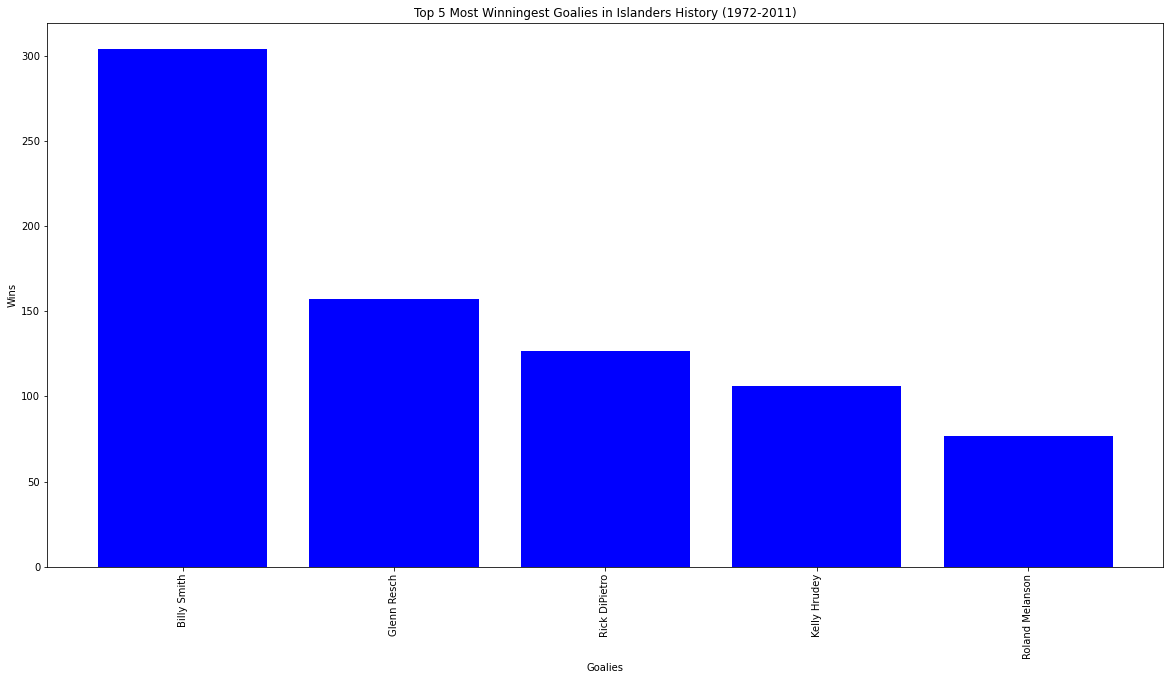

In [965]:
plt.figure(figsize=(20,10))
plt.bar(x=top_goalies_wins.index, height=top_goalies_wins,data = top_goalies_wins,color='blue')
plt.title('Top 5 Most Winningest Goalies in Islanders History (1972-2011)')
plt.xlabel('Goalies')
plt.ylabel('Wins')
plt.xticks(rotation=90)
plt.savefig("NYI_top_goalie_wins.png");

In [963]:
islanders_goalies[islanders_goalies['name']=='Billy Smith']

,playerID,year,tmID,lgID,GP,Min,W,L,T/OL,SHO,GA,PostGP,PostMin,PostW,PostL,PostT,PostSHO,PostGA,HOF,name
3471,smithbi01,1972,NYI,NHL,37.0,2122.0,7.0,24.0,3.0,0.0,147.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Billy Smith
3472,smithbi01,1973,NYI,NHL,46.0,2615.0,9.0,23.0,12.0,0.0,134.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Billy Smith
3473,smithbi01,1974,NYI,NHL,58.0,3368.0,21.0,18.0,17.0,3.0,156.0,6.0,333.0,1.0,4.0,0.0,0.0,23.0,1.0,Billy Smith
3474,smithbi01,1975,NYI,NHL,39.0,2254.0,19.0,10.0,9.0,3.0,98.0,8.0,437.0,4.0,3.0,0.0,0.0,21.0,1.0,Billy Smith
3475,smithbi01,1976,NYI,NHL,36.0,2089.0,21.0,8.0,6.0,2.0,87.0,10.0,580.0,7.0,3.0,0.0,0.0,27.0,1.0,Billy Smith
3476,smithbi01,1977,NYI,NHL,38.0,2154.0,20.0,8.0,8.0,2.0,95.0,1.0,47.0,0.0,0.0,0.0,0.0,1.0,1.0,Billy Smith
3477,smithbi01,1978,NYI,NHL,40.0,2261.0,25.0,8.0,4.0,1.0,108.0,5.0,315.0,4.0,1.0,0.0,1.0,10.0,1.0,Billy Smith
3478,smithbi01,1979,NYI,NHL,38.0,2114.0,15.0,14.0,7.0,2.0,104.0,20.0,1198.0,15.0,4.0,0.0,1.0,56.0,1.0,Billy Smith
3479,smithbi01,1980,NYI,NHL,41.0,2363.0,22.0,10.0,8.0,2.0,129.0,17.0,994.0,14.0,3.0,0.0,0.0,42.0,1.0,Billy Smith
3480,smithbi01,1981,NYI,NHL,46.0,2685.0,32.0,9.0,4.0,0.0,133.0,18.0,1120.0,15.0,3.0,0.0,1.0,47.0,1.0,Billy Smith
